In [ ]:
import pandas as pd
from numpy import random
from scipy.stats import expon
from math import log
import numpy 
import seaborn as sns
import matplotlib.pyplot as plt

# Задание 1. Работа с датасетом

In [ ]:
data = pd.read_csv('https://drive.google.com/u/0/uc?id=1P08K885c5M81d7EuWQeHv_OfPuW-bnO_')
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2863541,2,2016-01-31 13:12:20,2016-01-31 13:21:37,2,-73.989609,40.741718,-73.991013,40.755867,N,557
1,id1752141,1,2016-05-03 18:20:59,2016-05-03 18:41:09,1,-73.993935,40.761517,-73.975281,40.751507,N,1210
2,id1331142,1,2016-06-05 02:20:39,2016-06-05 02:28:04,1,-73.988625,40.722538,-73.980347,40.742752,N,445
3,id0227018,2,2016-01-11 20:07:13,2016-01-11 20:14:26,1,-73.976723,40.775311,-73.964333,40.765560,N,433
4,id2263790,2,2016-01-22 00:31:59,2016-01-22 00:40:48,5,-74.005852,40.740360,-73.988708,40.758781,N,529
...,...,...,...,...,...,...,...,...,...,...,...
99995,id1085998,2,2016-05-10 17:09:15,2016-05-10 17:28:13,1,-73.990089,40.751648,-73.981262,40.784264,N,1138
99996,id1119642,1,2016-02-13 23:25:04,2016-02-13 23:32:14,1,-73.985161,40.774433,-73.976547,40.790916,N,430
99997,id3739873,2,2016-04-19 17:22:31,2016-04-19 17:43:12,1,-73.975052,40.756241,-73.984818,40.769341,N,1241
99998,id1863124,2,2016-06-22 20:50:36,2016-06-22 21:04:30,1,-73.983192,40.744656,-73.950607,40.783321,N,834


In [ ]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Надо поменять нужные нам типы

In [ ]:
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)
data[data.dropoff_datetime.dt.day_of_week > 5]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2863541,2,2016-01-31 13:12:20,2016-01-31 13:21:37,2,-73.989609,40.741718,-73.991013,40.755867,N,557
2,id1331142,1,2016-06-05 02:20:39,2016-06-05 02:28:04,1,-73.988625,40.722538,-73.980347,40.742752,N,445
15,id0553347,1,2016-05-22 22:01:38,2016-05-22 22:11:05,1,-73.996323,40.742702,-73.971756,40.764626,N,567
21,id3009273,2,2016-05-29 23:25:21,2016-05-29 23:29:50,1,-73.986198,40.749748,-73.988411,40.758900,N,269
23,id0586359,2,2016-01-10 01:42:29,2016-01-10 01:49:43,2,-74.000916,40.761742,-73.986229,40.750587,N,434
...,...,...,...,...,...,...,...,...,...,...,...
99976,id0110195,2,2016-06-26 11:36:30,2016-06-26 11:46:41,1,-73.991455,40.742371,-73.982376,40.748177,N,611
99977,id0331334,1,2016-01-03 20:19:08,2016-01-03 20:21:31,1,-73.986107,40.743370,-73.981697,40.749718,N,143
99988,id2622579,2,2016-03-06 14:12:16,2016-03-06 14:21:13,1,-73.988487,40.759212,-74.003883,40.747547,N,537
99990,id3919255,1,2016-04-10 10:14:43,2016-04-10 10:22:44,2,-73.961388,40.774467,-73.969559,40.760349,N,481


Поменяно, выведен ответ, осталось 13442 строки из 99999

In [ ]:
data['month_name'] = data.dropoff_datetime.dt.month_name()
data.groupby(data.month_name)['id'].count()

month_name
April       17260
February    16090
January     15898
July            4
June        16169
March       17648
May         16931
Name: id, dtype: int64

В июле доставок вообще не было, интересное примечание

# Задание 2. Создание df

Сделаем функцию для генерации id

In [ ]:
from random import shuffle, randint

used_id = []

def get_id():
  characters = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'g', 'k']
  while True:
    shuffle(characters)
    id = ''.join(characters)
    if id not in used_id:
      used_id.append(id)
      return id

In [ ]:
df = pd.DataFrame()

df['user_id'] = [get_id() for s in range(10000)]
df['order_id'] = [randint(1, 10) for s in range(10000)]
df['delivery_time'] = random.normal(loc=1440, scale=200, size=10000)
df['pay_total'] = expon(loc=1, scale=1/2).rvs(size=10000)
df['retention'] = [numpy.random.choice(numpy.arange(1, 6), p=[0.35, 0.25, 0.2, 0.15, 0.05]) for s in range(10000)]
df

,user_id,order_id,delivery_time,pay_total,retention
0,295k7e3agg8bf061hci4d,4,1131.712868,1.852688,2
1,gf6ka8h57i1bg092dec34,4,1473.830783,1.399626,2
2,fea9b41g38h0275ck6dgi,8,1637.702344,2.411552,4
3,9a2c56kidh87g1f03gb4e,3,1309.353614,1.287583,3
4,208b7f1idk4hg563cga9e,9,1341.972737,1.433466,5
...,...,...,...,...,...
9995,kdfig79b3a40h56c18eg2,8,1544.470350,2.535270,2
9996,24g7f3hdg9i1ec068bk5a,6,1634.185290,1.105677,4
9997,kf127di8g95a063hgceb4,8,1557.334707,1.168181,1
9998,5cd74fak106g9egi3bh82,10,1517.830869,1.136710,1


# Задание 3. Дополнение df

In [ ]:
time_mean = df.groupby('order_id')['delivery_time'].mean()
time_mean

order_id
1     1440.686187
2     1444.369662
3     1439.834095
4     1445.652358
5     1427.743586
6     1436.286657
7     1446.822365
8     1442.576246
9     1425.246224
10    1440.150321
Name: delivery_time, dtype: float64

In [ ]:
df['mean_del_time'] = df.order_id.apply(lambda x: time_mean.loc[x])
df

,user_id,order_id,delivery_time,pay_total,retention,mean_del_time
0,295k7e3agg8bf061hci4d,4,1131.712868,1.852688,2,1445.652358
1,gf6ka8h57i1bg092dec34,4,1473.830783,1.399626,2,1445.652358
2,fea9b41g38h0275ck6dgi,8,1637.702344,2.411552,4,1442.576246
3,9a2c56kidh87g1f03gb4e,3,1309.353614,1.287583,3,1439.834095
4,208b7f1idk4hg563cga9e,9,1341.972737,1.433466,5,1425.246224
...,...,...,...,...,...,...
9995,kdfig79b3a40h56c18eg2,8,1544.470350,2.535270,2,1442.576246
9996,24g7f3hdg9i1ec068bk5a,6,1634.185290,1.105677,4,1436.286657
9997,kf127di8g95a063hgceb4,8,1557.334707,1.168181,1,1442.576246
9998,5cd74fak106g9egi3bh82,10,1517.830869,1.136710,1,1440.150321


Так как мы сделали нормальное распределение, очевино, что среднее будет примерно около 1440

In [ ]:
segments = {'[1, 2, 3]': '1-3', '[4, 5, 6]': '4-6', '[7, 8, 9]': '7-9', '[10]': '10'}
df['order_segment'] = df.order_id.apply(lambda x: segments[[s for s in segments.keys() if x in eval(s)][0]])
df

,user_id,order_id,delivery_time,pay_total,retention,mean_del_time,order_segment
0,295k7e3agg8bf061hci4d,4,1131.712868,1.852688,2,1445.652358,4-6
1,gf6ka8h57i1bg092dec34,4,1473.830783,1.399626,2,1445.652358,4-6
2,fea9b41g38h0275ck6dgi,8,1637.702344,2.411552,4,1442.576246,7-9
3,9a2c56kidh87g1f03gb4e,3,1309.353614,1.287583,3,1439.834095,1-3
4,208b7f1idk4hg563cga9e,9,1341.972737,1.433466,5,1425.246224,7-9
...,...,...,...,...,...,...,...
9995,kdfig79b3a40h56c18eg2,8,1544.470350,2.535270,2,1442.576246,7-9
9996,24g7f3hdg9i1ec068bk5a,6,1634.185290,1.105677,4,1436.286657,4-6
9997,kf127di8g95a063hgceb4,8,1557.334707,1.168181,1,1442.576246,7-9
9998,5cd74fak106g9egi3bh82,10,1517.830869,1.136710,1,1440.150321,10


Готово

# Задание 4. Исследование df

## Статистические показатели

In [ ]:
dscrb = df['pay_total'].describe().round()
dscrb

count    10000.0
mean         2.0
std          1.0
min          1.0
25%          1.0
50%          1.0
75%          2.0
max          6.0
Name: pay_total, dtype: float64

In [ ]:
print(f'Видим, что среднее по сумме заказов: {dscrb.loc["mean"]}')
print(f'Стандартное отклонение, т.е. разброс значений: {dscrb.loc["std"]}')
print(f'Медиана: {dscrb.loc["50%"]}')
print(f'Основная доля суммы заказов - это 50% лежит в диапазоне от {dscrb.loc["25%"]} до {dscrb.loc["75%"]}')
print(f'Мода суммы заказов, т.е. наиболее часто повторяющаяся сумма - {df["pay_total"].mode()[0]}')

Видим, что среднее по сумме заказов: 2.0
Стандартное отклонение, т.е. разброс значений: 1.0
Медиана: 1.0
Основная доля суммы заказов - это 50% лежит в диапазоне от 1.0 до 2.0
Мода суммы заказов, т.е. наиболее часто повторяющаяся сумма - 1.000025680757721


## График отражения среднего времени заказа в зависимости от его номера

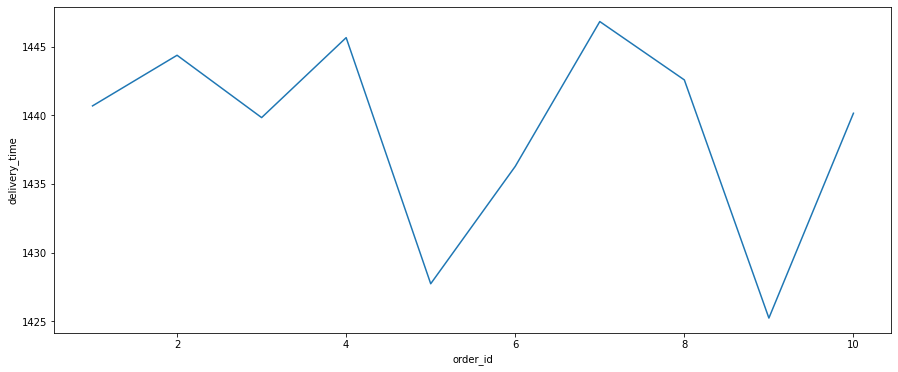

In [ ]:
fig = plt.figure()

ax = fig.add_subplot()

fig.set_figheight(6)
fig.set_figwidth(15)

sns.lineplot(data=time_mean, ax=ax)

## График распределения времени заказов в разрезе номеров

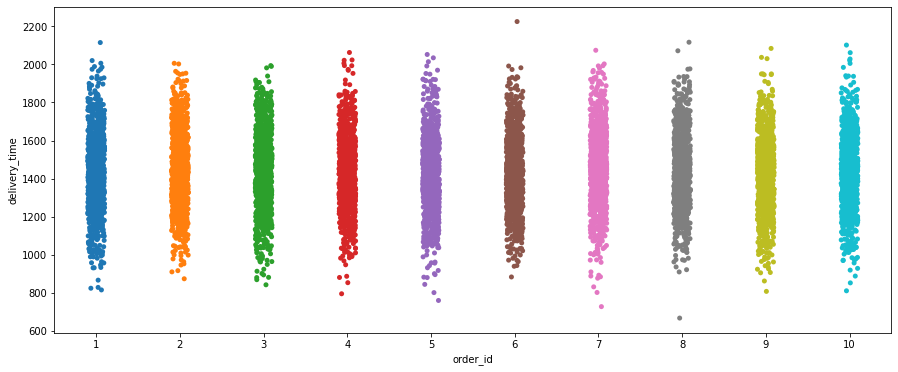

In [ ]:
fig = plt.figure()

ax = fig.add_subplot()

fig.set_figheight(6)
fig.set_figwidth(15)

sns.stripplot(data=df, y='delivery_time', x='order_id', ax=ax)

Так как мы делали время по нормальному распределению, то можем увидеть, что распределение времени в разрезе номера заказов примено одинаковое, квантили +- в одном и том же месте

# Задание 5. Кластеризация

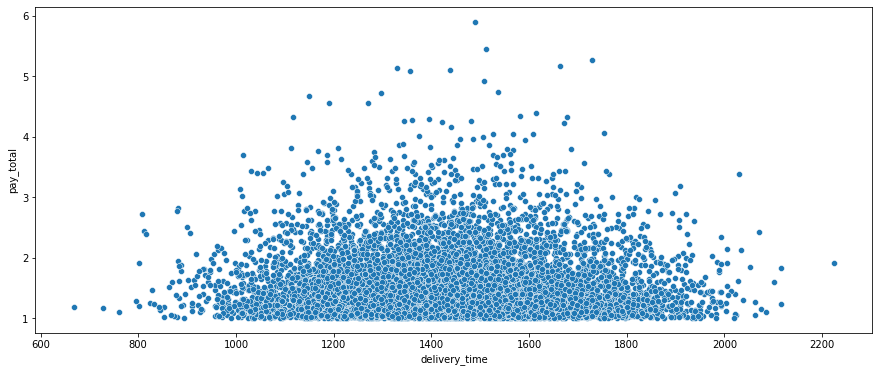

In [ ]:
fig = plt.figure()

ax = fig.add_subplot()

fig.set_figheight(6)
fig.set_figwidth(15)

sns.scatterplot(data=df, x='delivery_time', y='pay_total')

Как видим, тут один кластер и выбросы, для разделения лучше подойдёт алгоритм dbscan

<ipython-input-16-c42e265d62bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['delivery_time'] = X.delivery_time.apply(lambda x: x/1000)


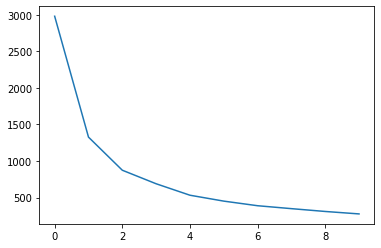

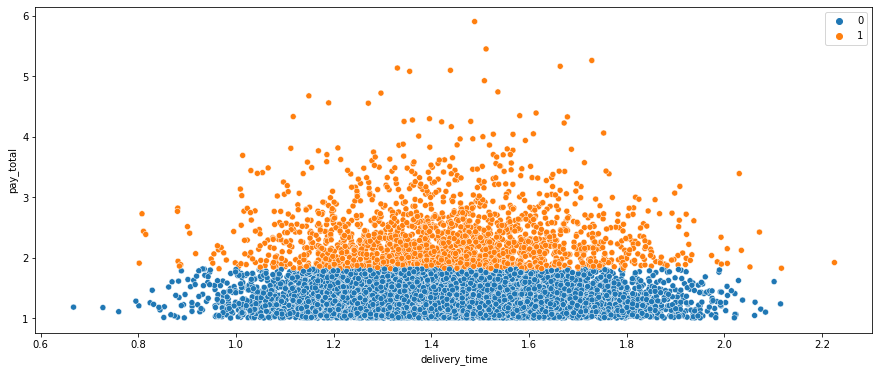

In [ ]:
from sklearn.cluster import KMeans

X = df[['delivery_time', 'pay_total']]
X['delivery_time'] = X.delivery_time.apply(lambda x: x/1000)

kmax = 10

sse = []
for k in range(1, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X.values)
  centroids = kmeans.cluster_centers_
  pred_clusters = kmeans.predict(X.values)
  curr_sse = 0
  
  # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
  for i in range(len(X.values)):
    curr_center = centroids[pred_clusters[i]]
    curr_sse += (X.values[i, 0] - curr_center[0]) ** 2 + (X.values[i, 1] - curr_center[1]) ** 2
    
  sse.append(curr_sse)

sns.lineplot(data=sse)


k_means = KMeans(n_clusters = 2)
k_means = k_means.fit(X)
clusters = k_means.predict(X)

fig = plt.figure()

ax = fig.add_subplot()

fig.set_figheight(6)
fig.set_figwidth(15)

sns.scatterplot(data=X, x='delivery_time', y='pay_total', hue=clusters)

In [ ]:
df['cluster'] = clusters
df

,user_id,order_id,delivery_time,pay_total,retention,mean_del_time,order_segment,cluster
0,295k7e3agg8bf061hci4d,4,1131.712868,1.852688,2,1445.652358,4-6,1
1,gf6ka8h57i1bg092dec34,4,1473.830783,1.399626,2,1445.652358,4-6,0
2,fea9b41g38h0275ck6dgi,8,1637.702344,2.411552,4,1442.576246,7-9,1
3,9a2c56kidh87g1f03gb4e,3,1309.353614,1.287583,3,1439.834095,1-3,0
4,208b7f1idk4hg563cga9e,9,1341.972737,1.433466,5,1425.246224,7-9,0
...,...,...,...,...,...,...,...,...
9995,kdfig79b3a40h56c18eg2,8,1544.470350,2.535270,2,1442.576246,7-9,1
9996,24g7f3hdg9i1ec068bk5a,6,1634.185290,1.105677,4,1436.286657,4-6,0
9997,kf127di8g95a063hgceb4,8,1557.334707,1.168181,1,1442.576246,7-9,0
9998,5cd74fak106g9egi3bh82,10,1517.830869,1.136710,1,1440.150321,10,0


# Задание 6. Анализ кластеров

In [ ]:
df.groupby('cluster').mean().T

cluster,0,1
order_id,5.472395,5.393258
delivery_time,1439.519793,1436.103520
pay_total,1.304444,2.329109
retention,2.306018,2.292135
mean_del_time,1438.784544,1439.123371


Видим, что кластеры в основном различаются по цене заказа